# Sentiment Analysis using Amazon Review

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%pip install wordcloud

# Exploratory Data Analysis

In [ ]:
#Load the data
df = pd.read_csv("amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [ ]:
df.head()

,rating,date,variation,verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe..."
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4..."
4,5,31-Jul-18,Charcoal Fabric,Music


In [ ]:
df.shape

(3150, 4)

In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
dtype: object

In [ ]:
df.columns.values

array(['rating', 'date', 'variation', 'verified_reviews'], dtype=object)

In [ ]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",174
4,5,31-Jul-18,Charcoal Fabric,Music,5


### Rating Column

In [ ]:
df.rating.unique()

array([5, 4, 3, 2, 1])

In [ ]:
df['feedback'] = np.where(df['rating']>=3,1,0)
df

,rating,date,variation,verified_reviews,length,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",197,1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",174,1
4,5,31-Jul-18,Charcoal Fabric,Music,5,1
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",52,1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",137,1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",443,1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",382,1


In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
length              0
feedback            0
dtype: int64

In [ ]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

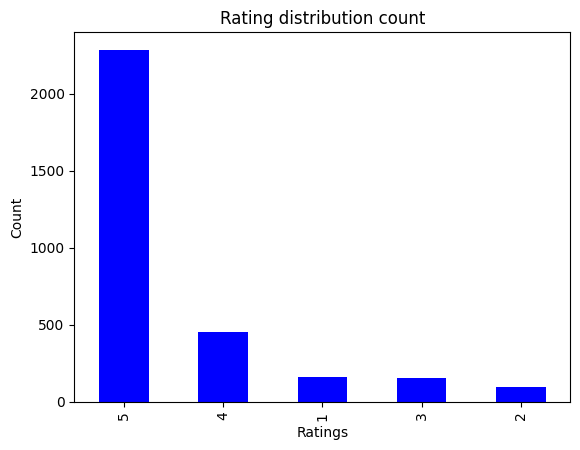

In [ ]:
df['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating

round(df['rating'].value_counts()/df.shape[0]*100,2)

5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64

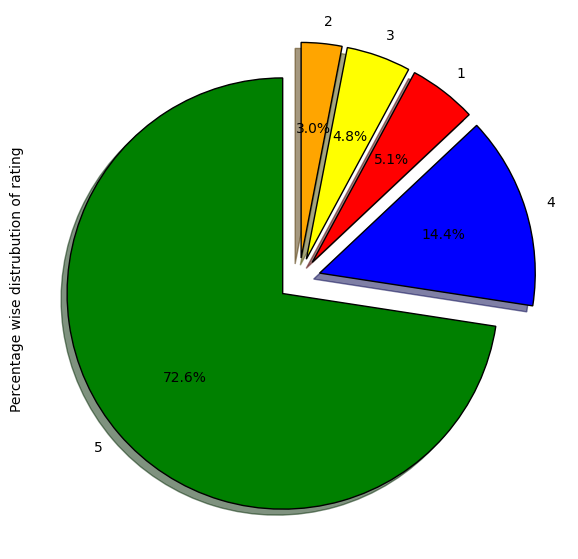

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ( 'green', 'blue','red','yellow','orange')
wp = {'linewidth':1, "edgecolor":'black'}
data = df['rating'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
data.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

* The rating of 5 is  having the highest occurances, **2286** times or **72.57%** of the total ratings.
* The rating of 2 has the lowest occurances, **96** times or **3.05%** of the total ratings.

### Feedback column
* The ratings from 3 to 5 are grouped as positive feedback and given a value of 1.
* The ratings from 1 and 2 are grouped as negative feedback and given a value of 0.

In [ ]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [174]:
# The percentage distribution of each feedback
round(df['feedback'].value_counts()/df.shape[0]*100,2)

1    91.84
0     8.16
Name: feedback, dtype: float64

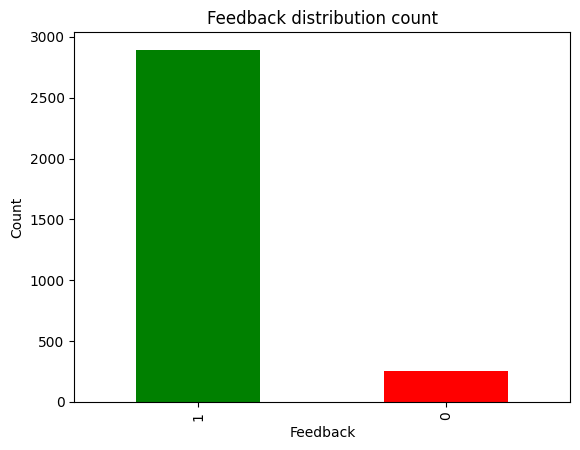

In [ ]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color = ['green','red'])
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distrubution of feedback'>

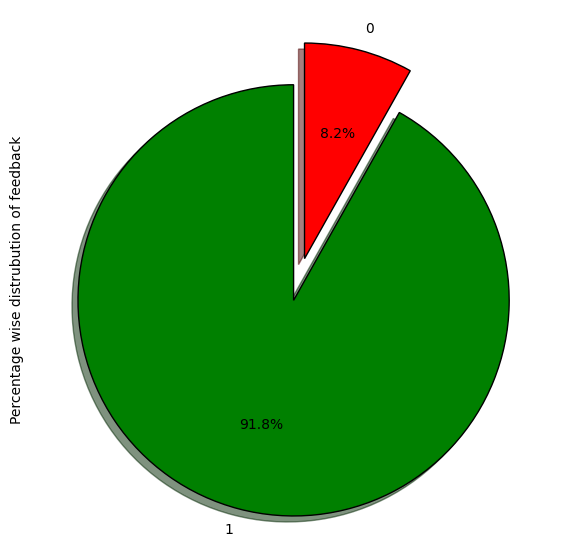

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ( 'green','red')
wp = {'linewidth':1, "edgecolor":'black'}
data = df['feedback'].value_counts()/df.shape[0]
explode=(0.1,0.1)
data.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')


* Feedback = 1 or **Positive feedback** has **2893** occurances and occupy **91.84%** of the data feedback column.
* Feedback = 1 or **Negative feedback** has **257** occurances and occupy **8.16 %** of the data feedback column.

In [ ]:
#Feedback = 0
df[df['feedback'] == 0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [ ]:
#Feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

### Variation column
This column refers to the type of Amazon Alexa product.

In [ ]:
# Distinct values of product 'variation'
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [ ]:
# Percentage distribution of each variation

round(df['variation'].value_counts()/df.shape[0]*100,2)

Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64

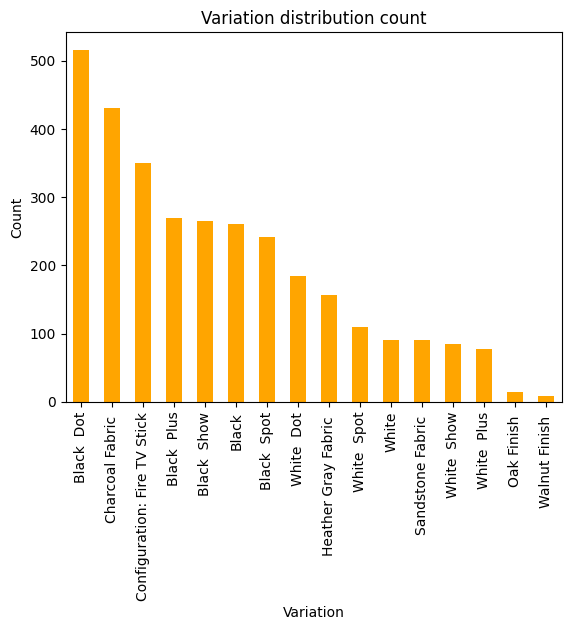

In [ ]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
round(df.groupby('variation')['rating'].mean().sort_values(ascending=False),2)

variation
Walnut Finish                   4.89
Oak Finish                      4.86
Charcoal Fabric                 4.73
Heather Gray Fabric             4.69
Configuration: Fire TV Stick    4.59
Black  Show                     4.49
Black  Dot                      4.45
White  Dot                      4.42
Black  Plus                     4.37
White  Plus                     4.36
Sandstone Fabric                4.36
White  Spot                     4.31
Black  Spot                     4.31
White  Show                     4.28
Black                           4.23
White                           4.14
Name: rating, dtype: float64

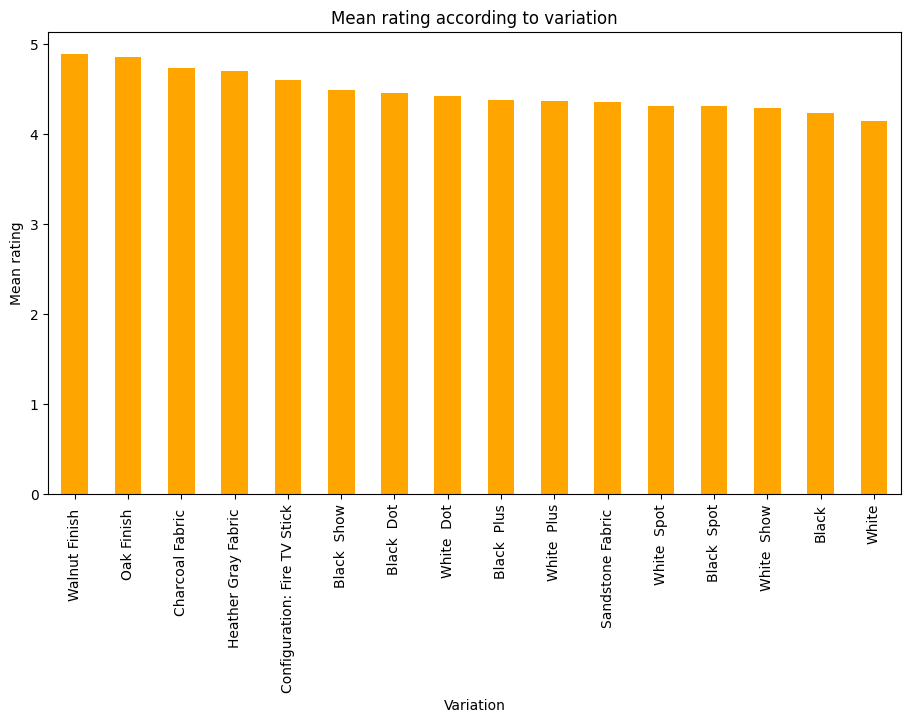

In [ ]:
df.groupby('variation')['rating'].mean().sort_values(ascending=False).plot.bar(color = 'orange', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### Verified reviews column

In [ ]:
df.head(2)

,rating,date,variation,verified_reviews,length,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,1


In [ ]:
df['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

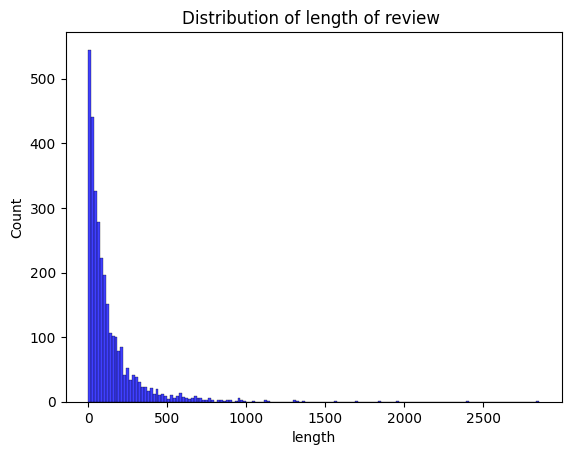

In [ ]:
sns.histplot(df['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

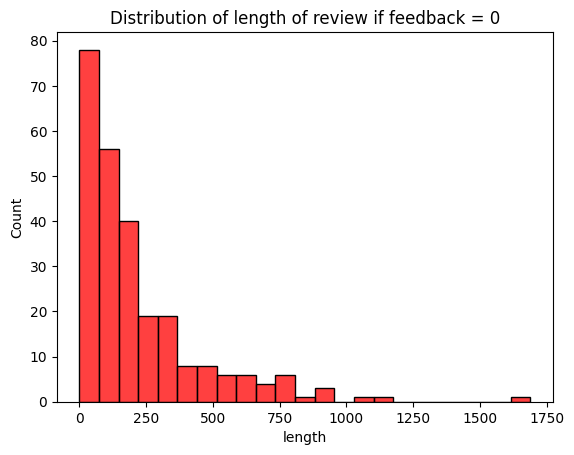

In [ ]:
sns.histplot(df[df['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

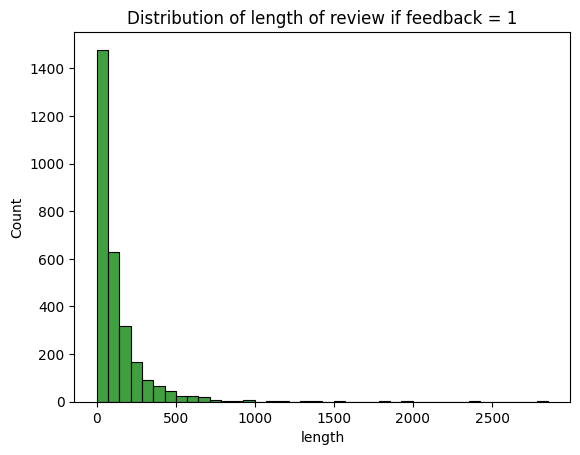

In [ ]:
sns.histplot(df[df['feedback']==1]['length'],bins=40,color='green').set(title='Distribution of length of review if feedback = 1')

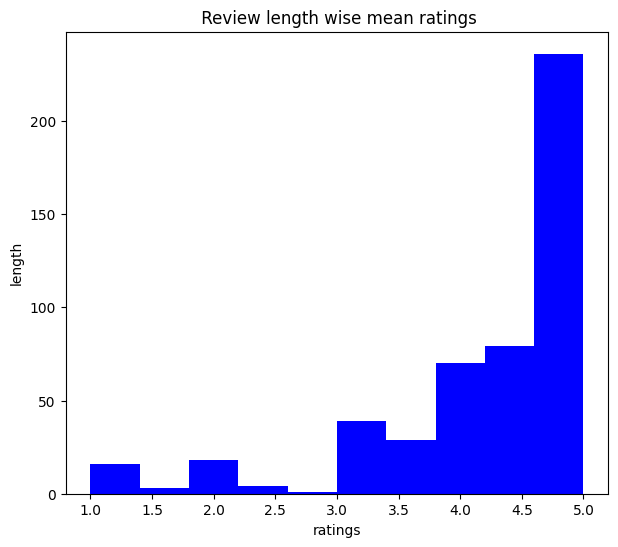

In [ ]:
df.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 10)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

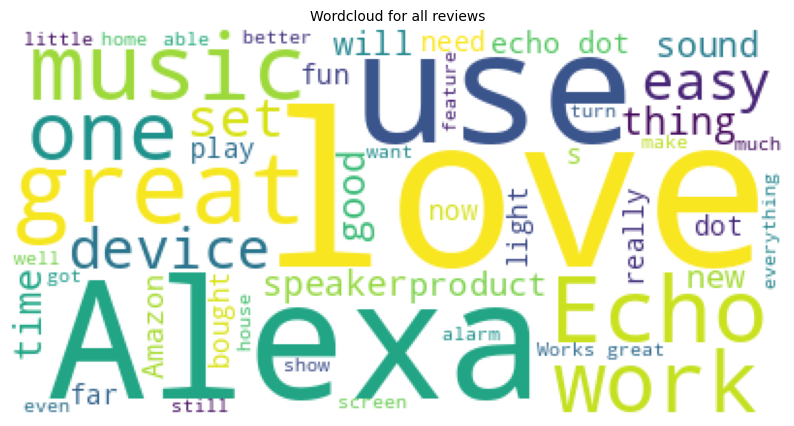

In [ ]:
from wordcloud import WordCloud

reviews = " ".join([review for review in df['verified_reviews']])

# Initializing wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present only in the feedback category
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

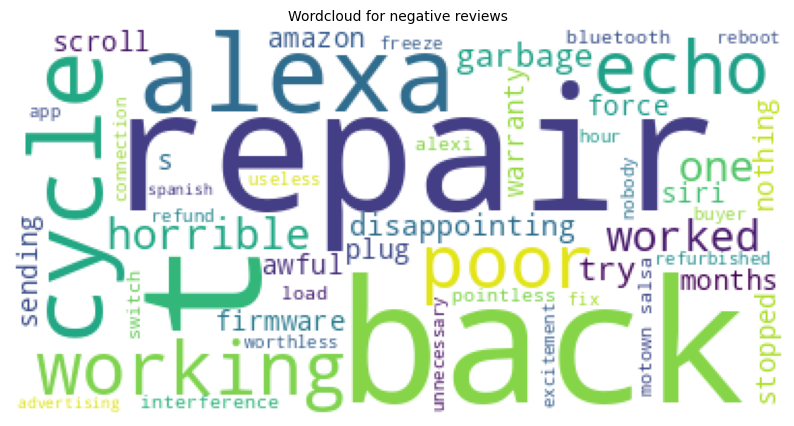

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

**Negative words** can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

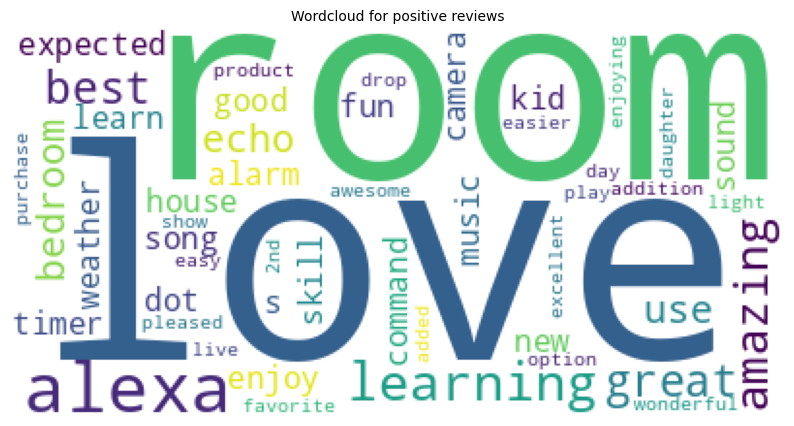

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

**Positive words** can be seen in the above word cloud - good, enjoying, amazing, best, great etc

# Preprocessing and Modelling

In [ ]:
import re
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [ ]:
import pickle

#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
#Saving scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386


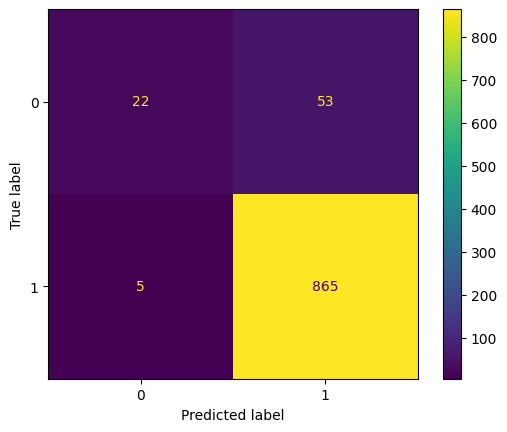

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_preds = model_rf.predict(X_test_scl)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print( accuracies.mean())
print( accuracies.std())

0.9374208144796379
0.010641756547092205


In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
# Best parameters from grid search

print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import accuracy_score

print("Cross validation train set mean accuracy : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation test set mean accuracy : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Test set accuracy score for  :", accuracy_score(y_test, y_preds))

Cross validation train set mean accuracy : 97.00703863247075
Cross validation test set mean accuracy : 92.3354913509271
Test set accuracy score for  : 0.9386243386243386


### XgBoost

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


In [ ]:
y_preds = model_xgb.predict(X_test)

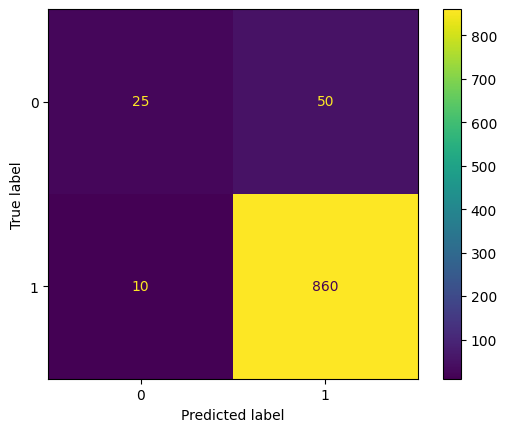

In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9079365079365079


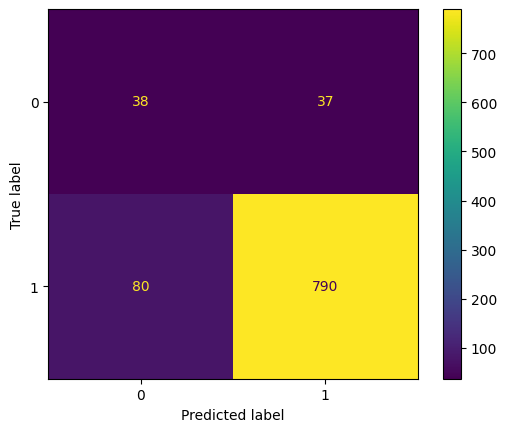

In [ ]:
y_preds = model_dt.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()